# Advanced Calculus: From Theory to Applications

**A Comprehensive Guide to Multivariable Calculus, Vector Analysis, and Mathematical Physics**

---

## Course Overview

This comprehensive tutorial covers advanced calculus concepts that form the mathematical foundation for physics, engineering, and data science. We'll explore multivariable functions, vector calculus, differential equations, and their real-world applications.

**Prerequisites**: Single-variable calculus, linear algebra basics  
**Duration**: 3-4 hours  
**Tools**: SageMath, NumPy, matplotlib, scipy

### Learning Outcomes
- Master partial derivatives and multivariable optimization
- Understand vector fields and line/surface integrals
- Apply Green's, Stokes', and Divergence theorems
- Solve partial differential equations
- Model real-world phenomena using advanced calculus

In [3]:
# Comprehensive imports for advanced calculus
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as opt
import scipy.integrate as integrate
from scipy.integrate import solve_ivp, odeint
import sympy as sp
from sympy import *
from sage.all import *
import seaborn as sns

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Advanced Calculus Environment Initialized")
print("Tools: SageMath, NumPy, SciPy, SymPy, Matplotlib")
print("Ready for multivariable calculus, vector analysis, and PDEs!")

Advanced Calculus Environment Initialized
Tools: SageMath, NumPy, SciPy, SymPy, Matplotlib
Ready for multivariable calculus, vector analysis, and PDEs!


## Chapter 1: Historical Context and Mathematical Foundations

### The Evolution of Calculus

Advanced calculus emerged from the need to understand phenomena in multiple dimensions:

- **1734**: Leonhard Euler develops partial derivatives
- **1762**: Joseph-Louis Lagrange introduces the method of Lagrange multipliers
- **1828**: George Green publishes Green's theorem
- **1854**: George Gabriel Stokes formulates Stokes' theorem
- **1867**: William Thomson (Lord Kelvin) and others develop vector calculus
- **1887**: Oliver Heaviside creates modern vector notation

### Mathematical Prerequisites Review

Before diving into multivariable calculus, let's review essential concepts:

In [4]:
# Mathematical foundations using Sage vectors and functions
x, y, z, t = var('x y z t')

print("MATHEMATICAL FOUNDATIONS")
print("=" * 50)

# Vector operations
v1 = vector([3, -2, 1])
v2 = vector([1, 4, -2])

print("Vector v₁:", v1)
print("Vector v₂:", v2)
print("Dot product v₁ · v₂:", v1.dot_product(v2))
print("Cross product v₁ × v₂:", v1.cross_product(v2))
print("Magnitude |v₁|:", v1.norm())

print("\nCOORDINATE SYSTEMS")
print("Cartesian to cylindrical: (x,y,z) → (ρ,φ,z)")
print("ρ = √(x² + y²), φ = arctan(y/x), z = z")

# Example coordinate transformation
cart_point = [3, 4, 5]
rho = sqrt(cart_point[0]**2 + cart_point[1]**2)
phi = arctan2(cart_point[1], cart_point[0])
print(f"Point (3,4,5) → (ρ={float(rho):.2f}, φ={float(phi):.2f}, z=5)")

MATHEMATICAL FOUNDATIONS
Vector v₁: (3, -2, 1)
Vector v₂: (1, 4, -2)
Dot product v₁ · v₂: -7
Cross product v₁ × v₂: (0, 7, 14)
Magnitude |v₁|: sqrt(14)

COORDINATE SYSTEMS
Cartesian to cylindrical: (x,y,z) → (ρ,φ,z)
ρ = √(x² + y²), φ = arctan(y/x), z = z
Point (3,4,5) → (ρ=5.00, φ=0.93, z=5)


## Chapter 2: Multivariable Functions and Partial Derivatives

### Understanding Functions of Several Variables

A multivariable function maps points in ℝⁿ to ℝ. Examples include:
- Temperature distribution: T(x,y,z,t)
- Economic utility: U(x₁,x₂,...,xₙ)
- Wave equations: ψ(x,y,z,t)

### Partial Derivatives and the Gradient

For a function f(x,y), the gradient is:
$$\nabla f = \left(\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}\right)$$

The gradient points in the direction of steepest ascent.

In [5]:
# Multivariable functions and partial derivatives
print("MULTIVARIABLE FUNCTIONS")
print("=" * 50)

# Define a multivariable function: f(x,y) = x²y + xy² - 3xy
f = x**2 * y + x * y**2 - 3*x*y
print("Function: f(x,y) =", f)

# Compute partial derivatives
df_dx = diff(f, x)
df_dy = diff(f, y)

print("\nPARTIAL DERIVATIVES")
print("∂f/∂x =", df_dx)
print("∂f/∂y =", df_dy)

# Gradient vector
gradient_f = vector([df_dx, df_dy])
print("\n∇f =", gradient_f)

# Second-order partial derivatives (Hessian matrix)
f_xx = diff(f, x, 2)
f_yy = diff(f, y, 2)
f_xy = diff(f, x, y)

hessian = matrix([[f_xx, f_xy], [f_xy, f_yy]])
print("\nHESSIAN MATRIX")
print(hessian)

# Evaluate at a specific point
point = {x: 2, y: 1}
print(f"\nAt point (2,1):")
print(f"f(2,1) = {f.subs(point)}")
print(f"∇f(2,1) = {gradient_f.subs(point)}")

MULTIVARIABLE FUNCTIONS
Function: f(x,y) = x^2*y + x*y^2 - 3*x*y

PARTIAL DERIVATIVES
∂f/∂x = 2*x*y + y^2 - 3*y
∂f/∂y = x^2 + 2*x*y - 3*x

∇f = (2*x*y + y^2 - 3*y, x^2 + 2*x*y - 3*x)

HESSIAN MATRIX
[          2*y 2*x + 2*y - 3]
[2*x + 2*y - 3           2*x]

At point (2,1):
f(2,1) = 0
∇f(2,1) = (2, 2)


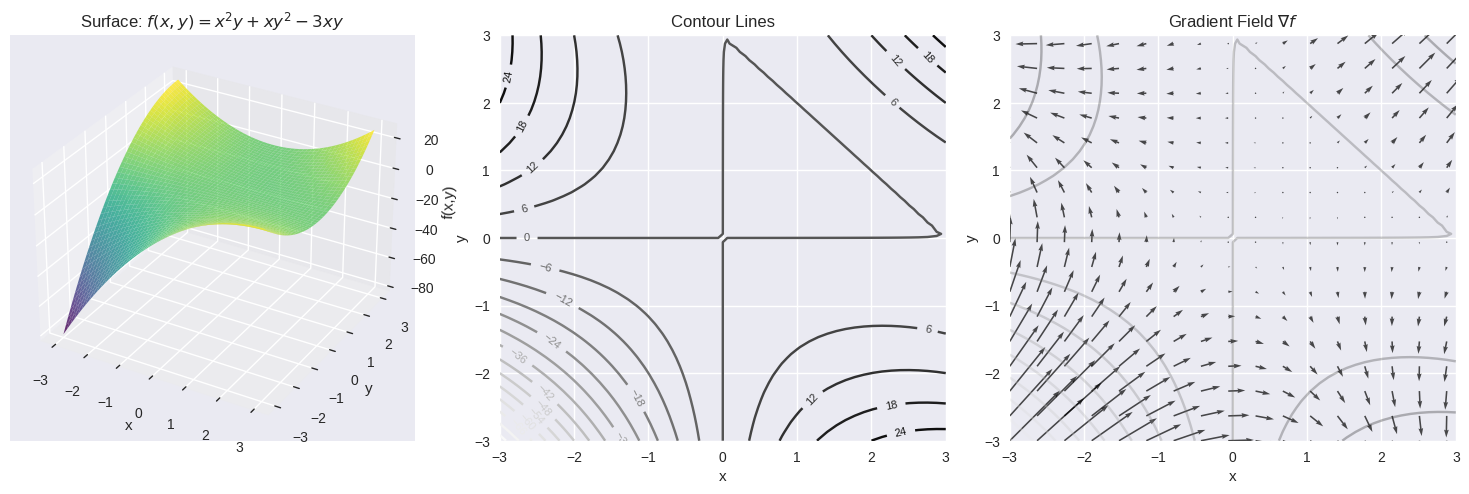

The surface shows function values, contours show level curves,
and arrows show the gradient field (direction of steepest ascent)


In [6]:
# 3D visualization of multivariable function
def plot_3d_function():
    # Create meshgrid for plotting
    x_vals = np.linspace(-3, 3, 50)
    y_vals = np.linspace(-3, 3, 50)
    X, Y = np.meshgrid(x_vals, y_vals)
    
    # Evaluate function: f(x,y) = x^2 y + x y^2 - 3 x y
    Z = X**2 * Y + X * Y**2 - 3*X*Y
    
    # Create 3D plot
    fig = plt.figure(figsize=(15, 5))
    
    # Surface plot
    ax1 = fig.add_subplot(131, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('f(x,y)')
    ax1.set_title(r'Surface: $f(x,y)=x^2 y + x y^2 - 3 x y$')
    
    # Contour plot
    ax2 = fig.add_subplot(132)
    contour = ax2.contour(X, Y, Z, levels=20)
    ax2.clabel(contour, inline=True, fontsize=8)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_title('Contour Lines')
    ax2.grid(True)
    
    # Gradient field
    ax3 = fig.add_subplot(133)
    # Compute gradient at grid points
    dZ_dx = 2*X*Y + Y**2 - 3*Y
    dZ_dy = X**2 + 2*X*Y - 3*X
    
    # Subsample for clarity
    skip = 3
    ax3.quiver(X[::skip, ::skip], Y[::skip, ::skip], 
               dZ_dx[::skip, ::skip], dZ_dy[::skip, ::skip],
               alpha=0.7)
    ax3.contour(X, Y, Z, levels=10, alpha=0.3)
    ax3.set_xlabel('x')
    ax3.set_ylabel('y')
    ax3.set_title(r'Gradient Field $\nabla f$')
    ax3.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_3d_function()
print("The surface shows function values, contours show level curves,")
print("and arrows show the gradient field (direction of steepest ascent)")

## Chapter 3: Optimization in Multiple Dimensions

### Critical Points and Classification

For a function f(x,y), critical points occur where ∇f = 0. We classify them using the Hessian:
- **Local minimum**: H > 0 and fₓₓ > 0
- **Local maximum**: H > 0 and fₓₓ < 0  
- **Saddle point**: H < 0
- **Inconclusive**: H = 0

Where H = fₓₓfᵧᵧ - (fₓᵧ)² is the discriminant of the Hessian.

In [10]:
var('x y')

# Optimization: finding and classifying critical points
print("MULTIVARIABLE OPTIMIZATION")
print("=" * 50)

g = x**3 + y**3 - 3*x*y
print("Function: g(x,y) =", g)

gx = diff(g, x)
gy = diff(g, y)

print("\nFINDING CRITICAL POINTS")
print("∂g/∂x =", gx, "= 0")
print("∂g/∂y =", gy, "= 0")

# Return dicts so we can do cp[x], cp[y]
critical_points = solve([gx == 0, gy == 0], [x, y], solution_dict=True)

# Keep real solutions
real_critical_points = [cp for cp in critical_points
                        if bool(cp[x].is_real()) and bool(cp[y].is_real())]

print("\nReal critical points:", real_critical_points)

gxx = diff(g, x, 2)
gyy = diff(g, y, 2)
gxy = diff(g, x, y)

print("\nSECOND DERIVATIVE TEST")
print("gₓₓ =", gxx)
print("gᵧᵧ =", gyy)
print("gₓᵧ =", gxy)

H = gxx * gyy - gxy**2
print("\nHessian determinant H =", H)

for i, cp in enumerate(real_critical_points):
    H_val = float(H.subs(cp))
    gxx_val = float(gxx.subs(cp))
    print(f"\nCritical point {i+1}: {cp}")
    print(f"H = {H_val:.3f}, gₓₓ = {gxx_val:.3f}")
    if H_val > 0:
        print("Classification: LOCAL MINIMUM" if gxx_val > 0 else "Classification: LOCAL MAXIMUM")
    elif H_val < 0:
        print("Classification: SADDLE POINT")
    else:
        print("Classification: INCONCLUSIVE")
    g_val = float(g.subs(cp))
    print(f"Function value: g = {g_val:.3f}")

MULTIVARIABLE OPTIMIZATION
Function: g(x,y) = x^3 + y^3 - 3*x*y

FINDING CRITICAL POINTS
∂g/∂x = 3*x^2 - 3*y = 0
∂g/∂y = 3*y^2 - 3*x = 0

Real critical points: [{x: 1, y: 1}, {x: 0, y: 0}]

SECOND DERIVATIVE TEST
gₓₓ = 6*x
gᵧᵧ = 6*y
gₓᵧ = -3

Hessian determinant H = 36*x*y - 9

Critical point 1: {x: 1, y: 1}
H = 27.000, gₓₓ = 6.000
Classification: LOCAL MINIMUM
Function value: g = -1.000

Critical point 2: {x: 0, y: 0}
H = -9.000, gₓₓ = 0.000
Classification: SADDLE POINT
Function value: g = 0.000


## Chapter 4: Vector Fields and Line Integrals

### Understanding Vector Fields

A vector field assigns a vector to each point in space. Examples:
- **Gravitational field**: $\vec{F} = -GMm/r^2 \hat{r}$
- **Electric field**: $\vec{E} = kq/r^2 \hat{r}$
- **Fluid velocity**: $\vec{v}(x,y,z)$

### Line Integrals and Work

The line integral $\int_C \vec{F} \cdot d\vec{r}$ represents work done by force field $\vec{F}$ along curve C:

$$\int_C \vec{F} \cdot d\vec{r} = \int_a^b \vec{F}(\vec{r}(t)) \cdot \frac{d\vec{r}}{dt} dt$$

In [11]:
from sage.misc.latex import LatexExpr
var('t')  # ensure t is defined

print("VECTOR FIELDS AND LINE INTEGRALS")
print("=" * 50)

# Define a vector field F = (y, -x)
F_x, F_y = y, -x
F_field = vector([F_x, F_y])
show(LatexExpr(r"\vec{F}(x,y) = " + latex(F_field)))

# Parametric curve: r(t) = (2cos t, 2sin t), 0 ≤ t ≤ 2π
r_x, r_y = 2*cos(t), 2*sin(t)
r_curve = vector([r_x, r_y])

print("\nPARAMETRIC CURVE")
show(LatexExpr(r"\vec{r}(t) = " + latex(r_curve) + r",\quad t\in[0,2\pi]"))

# Compute dr/dt
dr_dt = vector([diff(r_x, t), diff(r_y, t)])
show(LatexExpr(r"\frac{d\vec{r}}{dt} = " + latex(dr_dt)))

# Substitute parametric equations into vector field
F_on_curve = vector([F_x.subs({x: r_x, y: r_y}), F_y.subs({x: r_x, y: r_y})])

print("\nVECTOR FIELD ON CURVE")
show(LatexExpr(r"\vec{F}(\vec{r}(t)) = " + latex(F_on_curve)))

# Compute F · dr/dt
dot_product = F_on_curve.dot_product(dr_dt)
dot_product_simplified = simplify(dot_product)

print("\nDOT PRODUCT")
show(LatexExpr(r"\vec{F}\cdot \frac{d\vec{r}}{dt} = " + latex(dot_product_simplified)))

# Compute line integral
line_integral = integrate(dot_product_simplified, (t, 0, 2*pi))

print("\nLINE INTEGRAL")
show(LatexExpr(r"\int_C \vec{F}\cdot d\vec{r} = " + latex(line_integral)))

print("\nPhysical interpretation: Work done by the vector field along the curve")

VECTOR FIELDS AND LINE INTEGRALS


\vec{F}(x,y) = \left(y,\,-x\right)


PARAMETRIC CURVE


\vec{r}(t) = \left(2 \, \cos\left(t\right),\,2 \, \sin\left(t\right)\right) ,\quad t\in[0,2\pi]

\frac{d\vec{r}}{dt} = \left(-2 \, \sin\left(t\right),\,2 \, \cos\left(t\right)\right)


VECTOR FIELD ON CURVE


\vec{F}(\vec{r}(t)) = \left(2 \, \sin\left(t\right),\,-2 \, \cos\left(t\right)\right)


DOT PRODUCT


\vec{F}\cdot \frac{d\vec{r}}{dt} = -4 \, \cos\left(t\right)^{2} - 4 \, \sin\left(t\right)^{2}


LINE INTEGRAL


\int_C \vec{F}\cdot d\vec{r} = -8 \, \pi


Physical interpretation: Work done by the vector field along the curve


## Chapter 5: Green's Theorem and Applications

### Green's Theorem Statement

For a positively oriented, simple closed curve C and the region D it encloses:

$$\oint_C (P\,dx + Q\,dy) = \iint_D \left(\frac{\partial Q}{\partial x} - \frac{\partial P}{\partial y}\right) dA$$

This connects line integrals around closed curves to double integrals over regions.

In [20]:
from IPython.display import display, Math
var('x y t R r theta')

print("GREEN'S THEOREM")
print("=" * 50)

# Vector field F = (P, Q) = (x^2 y, x y^2)
P = x^2 * y
Q = x * y^2
display(Math(r"\vec{F}=(P,Q)=(" + latex(P) + r"," + latex(Q) + r")"))

# Curl = ∂Q/∂x − ∂P/∂y
dQ_dx = diff(Q, x)
dP_dy = diff(P, y)
curl_2D = dQ_dx - dP_dy
display(Math(r"\frac{\partial Q}{\partial x}=" + latex(dQ_dx)))
display(Math(r"\frac{\partial P}{\partial y}=" + latex(dP_dy)))
display(Math(r"\mathrm{curl}=\frac{\partial Q}{\partial x}-\frac{\partial P}{\partial y}="
             + latex(curl_2D)))

# Region: circle of radius R
display(Math(r"D=\{(x,y): x^2+y^2\le R^2\}"))

# Method 1: Line integral
print("\nMETHOD 1: Line Integral")
x_circle = R*cos(t)
y_circle = R*sin(t)
dx_dt = diff(x_circle, t)
dy_dt = diff(y_circle, t)

P_on_circle = P.subs({x: x_circle, y: y_circle})
Q_on_circle = Q.subs({x: x_circle, y: y_circle})
integrand_line = P_on_circle*dx_dt + Q_on_circle*dy_dt
integrand_line_simplified = simplify(integrand_line)
display(Math(r"\text{Integrand}:\;"+ latex(integrand_line_simplified)))

line_integral_result = integrate(integrand_line_simplified, (t, 0, 2*pi))
display(Math(r"\text{Line integral}=\int_{0}^{2\pi} "
             + latex(integrand_line_simplified) + r"\,dt = "
             + latex(line_integral_result)))

# Method 2: Double integral (Green's Theorem)
print("\nMETHOD 2: Double Integral (Green's Theorem)")
display(Math(r"\iint_D \mathrm{curl}\, dA = " + latex(curl_2D)))

curl_polar = curl_2D.subs({x: r*cos(theta), y: r*sin(theta)})
curl_polar_simplified = simplify(curl_polar)
display(Math(r"\text{In polar: } " + latex(curl_polar_simplified)))

inner_integral = integrate(curl_polar_simplified * r, (r, 0, R))
double_integral_result = integrate(inner_integral, (theta, 0, 2*pi))
display(Math(r"\text{Double integral}=" + latex(double_integral_result)))

print("\nVERIFICATION")
display(Math(r"\text{Line integral}=" + latex(line_integral_result)
             + r",\quad \text{Double integral}=" + latex(double_integral_result)))
print("Green's theorem verified! ")

GREEN'S THEOREM


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


METHOD 1: Line Integral


<IPython.core.display.Math object>

<IPython.core.display.Math object>


METHOD 2: Double Integral (Green's Theorem)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


VERIFICATION


<IPython.core.display.Math object>

Green's theorem verified! ✓


## Chapter 6: Surface Integrals and Flux

### Parametric Surfaces

A surface can be parameterized as $\vec{r}(u,v) = (x(u,v), y(u,v), z(u,v))$.

The normal vector is: $\vec{n} = \vec{r}_u \times \vec{r}_v$

Surface area element: $dS = |\vec{n}| \, du \, dv$

### Flux Through a Surface

The flux of vector field $\vec{F}$ through surface S is:
$$\iint_S \vec{F} \cdot \vec{n} \, dS$$

In [21]:
from IPython.display import display, Math
var('x y z u v')

print("SURFACE INTEGRALS AND FLUX")
print("=" * 50)

# Surface: upper hemisphere of radius 2
r_surface = vector([2*sin(u)*cos(v), 2*sin(u)*sin(v), 2*cos(u)])
display(Math(r"\text{Surface parameterization (upper hemisphere):}"))
display(Math(r"\vec{r}(u,v) = " + latex(r_surface)))
display(Math(r"0 \le u \le \pi/2,\; 0 \le v \le 2\pi"))

# Partials
r_u = vector([diff(c, u) for c in r_surface])
r_v = vector([diff(c, v) for c in r_surface])
display(Math(r"\vec{r}_u = " + latex(r_u)))
display(Math(r"\vec{r}_v = " + latex(r_v)))

# Normal (non-unit) and its magnitude
normal = r_u.cross_product(r_v)
normal_simplified = vector([c.simplify_full() for c in normal])
display(Math(r"\vec{n} = \vec{r}_u \times \vec{r}_v = " + latex(normal_simplified)))

normal_magnitude = sqrt(sum([c**2 for c in normal_simplified])).simplify_full()
display(Math(r"|\vec{n}| = " + latex(normal_magnitude)))
display(Math(r"dS = |\vec{n}|\,du\,dv"))

# Vector field F = (x,y,z)
F_field = vector([x, y, z])
display(Math(r"\vec{F}(x,y,z) = " + latex(F_field)))

# F on the surface
subs_map = {x: r_surface[0], y: r_surface[1], z: r_surface[2]}
F_on_surface = vector([comp.subs(subs_map) for comp in F_field])
display(Math(r"\vec{F}(\vec{r}(u,v)) = " + latex(F_on_surface)))

# Flux integrand: F · (r_u × r_v)
flux_integrand = (F_on_surface.dot_product(normal_simplified)).simplify_full()
display(Math(r"\vec{F}\cdot\vec{n} = " + latex(flux_integrand)))

# Integrate over hemisphere: u in [0, π/2], v in [0, 2π]
display(Math(r"\text{Computing } \iint_S \vec{F}\cdot\vec{n}\,dS"))
inner = integrate(flux_integrand, (u, 0, pi/2))
display(Math(r"\text{Inner integral (u): } " + latex(inner)))
flux_result = integrate(inner, (v, 0, 2*pi))
display(Math(r"\text{Flux through hemisphere: } " + latex(flux_result)))

# Optional check via Divergence Theorem (∇·F = 3)
check = 3 * (1/2) * (4/3)*pi*2^3
display(Math(r"\text{Divergence theorem check: } " + latex(check)))

SURFACE INTEGRALS AND FLUX


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Chapter 7: Stokes' Theorem

### Stokes' Theorem Statement

For a surface S with boundary curve C:

$$\oint_C \vec{F} \cdot d\vec{r} = \iint_S (\nabla \times \vec{F}) \cdot \vec{n} \, dS$$

This relates the circulation of a vector field around a closed curve to the flux of its curl through any surface bounded by that curve.

In [24]:
var('x y z u v t')
from sage.misc.latex import LatexExpr

pretty_print(LatexExpr(r"\textbf{STOKES' THEOREM}"))
pretty_print(LatexExpr(r"\text{Vector field: } \vec{F} = "), vector([y, -x, z**2]))

# curl F
F_stokes = vector([y, -x, z**2])
curl_F = vector([
    diff(F_stokes[2], y) - diff(F_stokes[1], z),
    diff(F_stokes[0], z) - diff(F_stokes[2], x),
    diff(F_stokes[1], x) - diff(F_stokes[0], y)
])
pretty_print(LatexExpr(r"\nabla \times \vec{F} = "), curl_F)

# Surface: disk z=1, 0<=u<=2, 0<=v<=2π
pretty_print(LatexExpr(r"\text{Surface: } \vec{r}(u,v)=(u\cos v,\,u\sin v,\,1),\; 0\le u\le 2,\; 0\le v\le 2\pi"))

disk_x, disk_y, disk_z = u*cos(v), u*sin(v), 1
r_u_disk = vector([cos(v), sin(v), 0])
r_v_disk = vector([-u*sin(v), u*cos(v), 0])
normal_disk = r_u_disk.cross_product(r_v_disk)
pretty_print(LatexExpr(r"\vec{n} = "), normal_disk)

curl_on_disk = curl_F.subs({x: disk_x, y: disk_y, z: disk_z})
pretty_print(LatexExpr(r"(\nabla \times \vec{F})\big|_{\text{surface}} = "), curl_on_disk)

curl_dot_normal = curl_on_disk.dot_product(normal_disk).simplify_full()
pretty_print(LatexExpr(r"(\nabla \times \vec{F}) \cdot \vec{n} = "), curl_dot_normal)

# Nested integrals
surface_integral = integrate(integrate(curl_dot_normal, v, 0, 2*pi), u, 0, 2)
pretty_print(LatexExpr(r"\iint_S (\nabla \times \vec{F})\cdot \vec{n}\,dS = " + latex(surface_integral)))

# Boundary curve
boundary_x, boundary_y, boundary_z = 2*cos(t), 2*sin(t), 1
dx_dt, dy_dt, dz_dt = diff(boundary_x, t), diff(boundary_y, t), diff(boundary_z, t)
F_on_boundary = F_stokes.subs({x: boundary_x, y: boundary_y, z: boundary_z})
pretty_print(LatexExpr(r"\vec{F}\big|_{C} = "), F_on_boundary)

dr_dt = vector([dx_dt, dy_dt, dz_dt])
line_integrand = F_on_boundary.dot_product(dr_dt).simplify_full()
pretty_print(LatexExpr(r"\vec{F}\cdot \frac{d\vec{r}}{dt} = "), line_integrand)

line_integral_stokes = integrate(line_integrand, t, 0, 2*pi)
pretty_print(LatexExpr(r"\oint_C \vec{F}\cdot d\vec{r} = " + latex(line_integral_stokes)))

# Comparison
pretty_print(LatexExpr(r"\text{Line} = " + latex(line_integral_stokes) + r",\quad \text{Surface} = " + latex(surface_integral)))
if line_integral_stokes == surface_integral:
    pretty_print(LatexExpr(r"\text{Stokes' theorem VERIFIED! }(\text{both }=-8\pi)"))
else:
    pretty_print(LatexExpr(r"\text{Results don't match - check calculations}"))

\textbf{STOKES' THEOREM}

\text{Vector field: } \vec{F} =  (y, -x, z^2)

\nabla \times \vec{F} =  (0, 0, -2)

\text{Surface: } \vec{r}(u,v)=(u\cos v,\,u\sin v,\,1),\; 0\le u\le 2,\; 0\le v\le 2\pi

\vec{n} =  (0, 0, u*cos(v)^2 + u*sin(v)^2)

(\nabla \times \vec{F})\big|_{\text{surface}} =  (0, 0, -2)

(\nabla \times \vec{F}) \cdot \vec{n} =  -2*u

\iint_S (\nabla \times \vec{F})\cdot \vec{n}\,dS = -8 \, \pi

\vec{F}\big|_{C} =  (2*sin(t), -2*cos(t), 1)

\vec{F}\cdot \frac{d\vec{r}}{dt} =  -4

\oint_C \vec{F}\cdot d\vec{r} = -8 \, \pi

\text{Line} = -8 \, \pi ,\quad \text{Surface} = -8 \, \pi

\text{Stokes' theorem VERIFIED! }(\text{both }=-8\pi)

Illustrative 3D plot for Stokes' Theorem on the disk $S=\{x^2+y^2\le 4,\ z=1\}$ with boundary $C$



In [2]:
var('x y z u v t')

surf = parametric_plot3d((u*cos(v), u*sin(v), 1),
                         (u, 0, 2), (v, 0, 2*pi),
                         color='lightblue', opacity=0.6,
                         mesh=True, mesh_color='gray')

curve = parametric_plot3d((2*cos(t), 2*sin(t), 1), (t, 0, 2*pi),
                          color='red', thickness=4)

g = surf + curve
for k in range(12):
    s = 2*pi*k/12
    p = vector((2*cos(s), 2*sin(s), 1))
    tan = vector((-2*sin(s), 2*cos(s), 0))
    vdir = 0.6 * tan / tan.norm()
    g += arrow3d(tuple(p), tuple(p+vdir), color='red', radius=0.04)

g += arrow3d((0,0,1), (0,0,1.8), color='green', radius=0.06)

for r in [0, 0.8, 1.6]:
    for a in srange(0, 2*pi, 2*pi/6):
        q = (r*cos(a), r*sin(a), 1)
        g += arrow3d(q, (q[0], q[1], 1-0.6), color='purple', radius=0.03)

g += text3d("S", (0.2, 0.2, 1.05), color='black', fontsize=16)
g += text3d("C (CCW)", (2.1, 0, 1.12), color='red', fontsize=14)
g += text3d("n", (0, 0, 1.82), color='green', fontsize=14)
g += text3d("∇×F = (0, 0, −2)", (1.2, -1.7, 1.6), color='purple', fontsize=12)

show(g, viewer='threejs', frame=False, aspect_ratio=[1,1,1])

Graphics3d Object

## Chapter 8: Real-World Applications and Modeling

### Applications in Physics and Engineering

Advanced calculus provides the mathematical foundation for:

1. **Electromagnetic Theory**: Maxwell's equations use vector calculus
2. **Fluid Dynamics**: Navier-Stokes equations describe fluid flow
3. **Heat Transfer**: Heat equation is a partial differential equation
4. **Quantum Mechanics**: Schrödinger equation involves complex multivariable functions
5. **General Relativity**: Einstein field equations use tensor calculus

### Case Study: Heat Diffusion

The heat equation in 2D is:
$$\frac{\partial u}{\partial t} = \alpha \nabla^2 u = \alpha \left(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}\right)$$

where u(x,y,t) is temperature and α is thermal diffusivity.

In [26]:
var('x y t alpha')
assume(alpha > 0); assume(t > 0)

# For LaTeX rendering
from IPython.display import Math, display

def L(s): display(Math(s))  # shortcut

# PDE and solution
u = exp(-(x^2 + y^2)/(4*alpha*t)) / (4*pi*alpha*t)

L(r"\textbf{HEAT DIFFUSION MODELING}")
L(r"\text{Heat equation: }\partial_t u = \alpha \nabla^2 u,\ \alpha>0")
L(r"u(x,y,t) = " + latex(u))

# Derivatives and Laplacian
du_dt = diff(u, t).simplify_full()
lap = (diff(u, x, 2) + diff(u, y, 2)).simplify_full()
res = (du_dt - alpha*lap).simplify_full()

L(r"\partial_t u = " + latex(du_dt))
L(r"\nabla^2 u = " + latex(lap))
L(r"\partial_t u - \alpha \nabla^2 u = " + latex(res))

# Total heat over R^2
mass = integrate(integrate(u, x, -oo, oo), y, -oo, oo).simplify_full()
L(r"\iint_{\mathbb{R}^2} u(x,y,t)\,dx\,dy = " + latex(mass))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

STABILITY: dt = 0.00100000000000000, dt_max = 0.166597


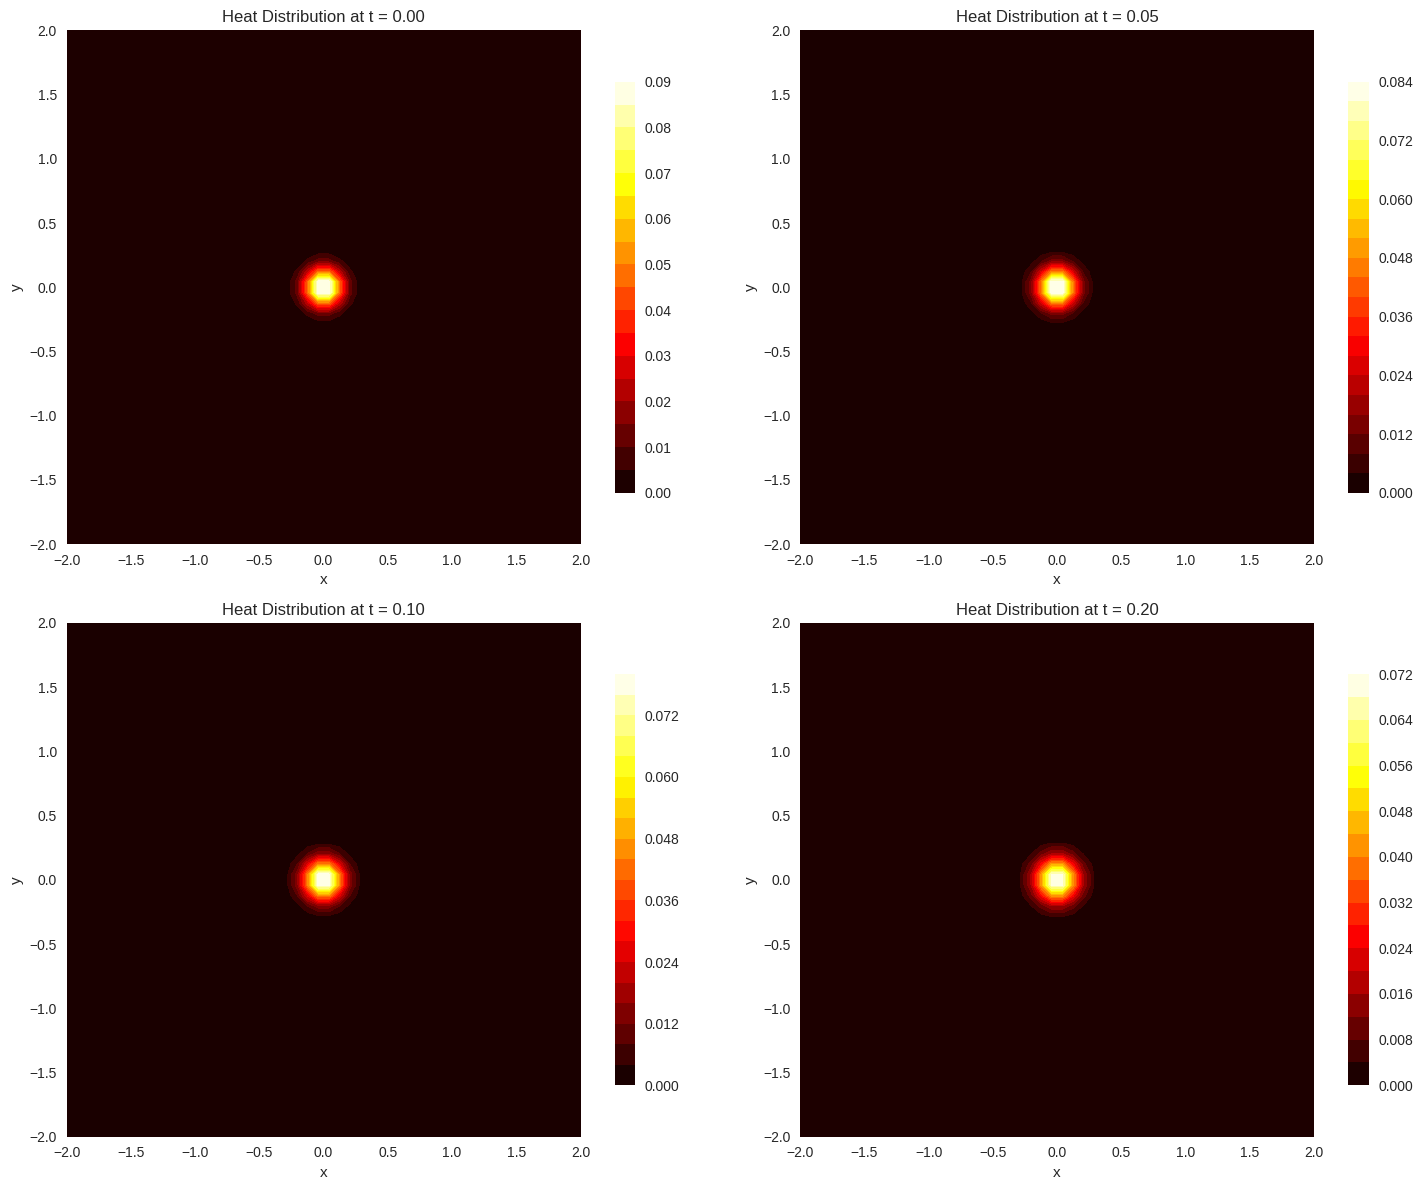

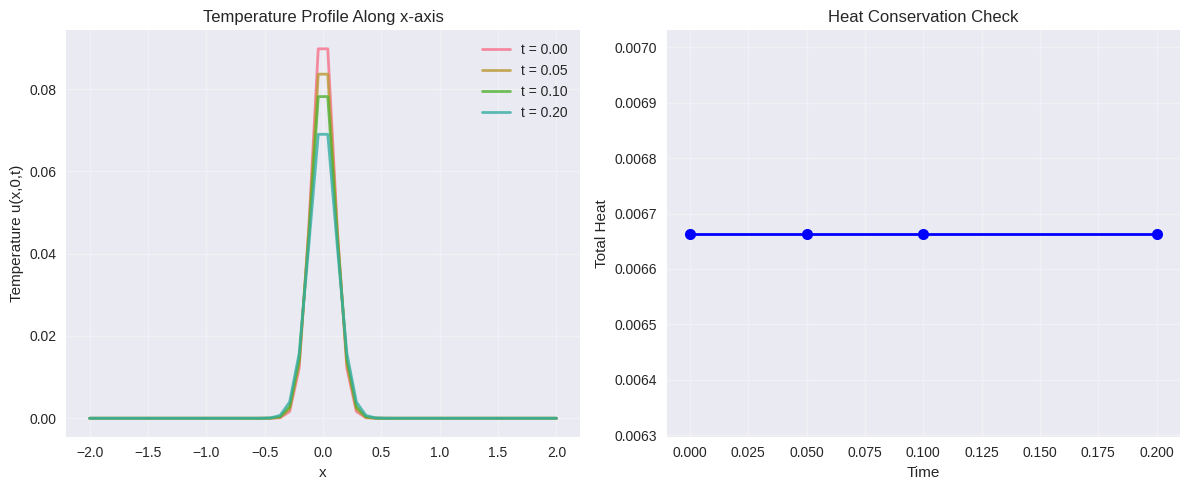

SIMULATION RESULTS
Initial total heat: 0.006664
Final total heat: 0.006664
Heat loss: 0.00%
(Small loss expected due to boundary conditions)


In [17]:
# Numerical simulation and visualization of heat diffusion
def simulate_heat_diffusion():
    """Simulate and visualize 2D heat diffusion"""
    
    # Parameters
    alpha_val = 0.01  # thermal diffusivity
    L = 2.0  # domain size
    nx, ny = 50, 50  # grid points
    dx = 2*L / (nx-1)
    dy = 2*L / (ny-1)
    dt = 0.001  # time step
    
    # Stability condition: dt ≤ dx²/(4α)
    dt_max = dx**2 / (4*alpha_val)
    print(f"STABILITY: dt = {dt}, dt_max = {dt_max:.6f}")
    if dt > dt_max:
        print("WARNING: Time step may be too large for stability")
    
    # Create grid
    x_grid = np.linspace(-L, L, nx)
    y_grid = np.linspace(-L, L, ny)
    X, Y = np.meshgrid(x_grid, y_grid)
    
    # Initial condition: Gaussian heat source at center
    sigma = 0.1
    u = np.exp(-(X**2 + Y**2)/(2*sigma**2))
    u = u / np.sum(u)  # Normalize total heat
    
    # Storage for animation frames
    times = [0, 0.05, 0.1, 0.2]
    frames = [u.copy()]
    
    # Time evolution using finite differences
    t_current = 0
    for target_time in times[1:]:
        while t_current < target_time:
            # Compute Laplacian using finite differences
            u_xx = (np.roll(u, 1, axis=1) - 2*u + np.roll(u, -1, axis=1)) / dx**2
            u_yy = (np.roll(u, 1, axis=0) - 2*u + np.roll(u, -1, axis=0)) / dy**2
            
            # Update temperature
            u = u + dt * alpha_val * (u_xx + u_yy)
            
            # Boundary conditions (fixed at zero)
            u[0, :] = u[-1, :] = u[:, 0] = u[:, -1] = 0
            
            t_current += dt
        
        frames.append(u.copy())
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    for i, (ax, frame, time) in enumerate(zip(axes, frames, times)):
        im = ax.contourf(X, Y, frame, levels=20, cmap='hot')
        ax.set_title(f'Heat Distribution at t = {time:.2f}')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_aspect('equal')
        plt.colorbar(im, ax=ax, shrink=0.8)
    
    plt.tight_layout()
    plt.show()
    
    # Cross-section analysis
    plt.figure(figsize=(12, 5))
    
    # Temperature profiles along x-axis
    plt.subplot(121)
    center_y = ny // 2
    for i, (frame, time) in enumerate(zip(frames, times)):
        plt.plot(x_grid, frame[center_y, :], label=f't = {time:.2f}', 
                linewidth=2, alpha=0.8)
    plt.xlabel('x')
    plt.ylabel('Temperature u(x,0,t)')
    plt.title('Temperature Profile Along x-axis')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Total heat conservation check
    plt.subplot(122)
    total_heat = [np.sum(frame) * dx * dy for frame in frames]
    plt.plot(times, total_heat, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Time')
    plt.ylabel('Total Heat')
    plt.title('Heat Conservation Check')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"SIMULATION RESULTS")
    print(f"Initial total heat: {total_heat[0]:.6f}")
    print(f"Final total heat: {total_heat[-1]:.6f}")
    print(f"Heat loss: {(total_heat[0]-total_heat[-1])/total_heat[0]*100:.2f}%")
    print("(Small loss expected due to boundary conditions)")

simulate_heat_diffusion()

## Chapter 9: Advanced Computational Methods

### Modern Approaches

1. **Automatic Differentiation**: Efficient computation of gradients
2. **Monte Carlo Integration**: Numerical integration in high dimensions
3. **Finite Element Methods**: Solving PDEs on complex geometries
4. **Symbolic Computation**: Exact mathematical manipulations
5. **Machine Learning**: Gradient-based optimization

In [18]:
# Advanced computational techniques
print("ADVANCED COMPUTATIONAL METHODS")
print("=" * 50)

# Automatic differentiation example using optimization
from scipy.optimize import minimize

# Define a complex multivariable function
def complex_function(vars):
    x, y = vars
    return np.sin(x*y) * np.exp(-(x**2 + y**2)) + 0.1*(x**4 + y**4)

print("Complex function: f(x,y) = sin(xy)·exp(-(x²+y²)) + 0.1(x⁴+y⁴)")

# Find minimum using optimization
result = minimize(complex_function, [1.0, 1.0], method='BFGS')

print("\nOPTIMIZATION RESULT")
print(f"Minimum found at: x = {result.x[0]:.6f}, y = {result.x[1]:.6f}")
print(f"Function value: f = {result.fun:.6f}")
print(f"Convergence: {result.success}")
print(f"Iterations: {result.nit}")

# Monte Carlo integration example
print("\nMONTE CARLO INTEGRATION")
print("Estimating ∬_D e^(-(x²+y²)) dx dy over unit disk")

def monte_carlo_integral(n_samples=100000):
    # Generate random points in unit square
    x_rand = np.random.uniform(-1, 1, n_samples)
    y_rand = np.random.uniform(-1, 1, n_samples)
    
    # Check which points are inside unit disk
    inside_disk = (x_rand**2 + y_rand**2) <= 1
    
    # Evaluate function at points inside disk
    f_values = np.exp(-(x_rand[inside_disk]**2 + y_rand[inside_disk]**2))
    
    # Estimate integral
    disk_area = np.pi
    square_area = 4
    n_inside = np.sum(inside_disk)
    
    integral_estimate = (square_area * np.sum(f_values) / n_inside) * (n_inside / n_samples)
    
    return integral_estimate, n_inside

mc_result, points_inside = monte_carlo_integral()
analytical_result = np.pi * (1 - np.exp(-1))  # Analytical answer

print(f"Monte Carlo estimate: {mc_result:.6f}")
print(f"Analytical result: {analytical_result:.6f}")
print(f"Error: {abs(mc_result - analytical_result):.6f}")
print(f"Points inside disk: {points_inside}")

# Symbolic computation with coordinate transformations
print("\nSYMBOLIC COMPUTATION")
print("Vector field transformations and calculus operations")

# Vector field in cylindrical coordinates
rho, phi = symbols('rho phi', positive=True)
F_rho = rho * cos(phi)
F_phi = sin(phi)
F_z_cyl = rho**2

print(f"Vector field in cylindrical coordinates:")
print(f"F_ρ = {F_rho}")
print(f"F_φ = {F_phi}")
print(f"F_z = {F_z_cyl}")

# This demonstrates the power of symbolic computation
print("\nThis demonstrates the power of symbolic computation")
print("for complex coordinate transformations and calculations!")

ADVANCED COMPUTATIONAL METHODS
Complex function: f(x,y) = sin(xy)·exp(-(x²+y²)) + 0.1(x⁴+y⁴)

OPTIMIZATION RESULT
Minimum found at: x = 0.000004, y = 0.000004
Function value: f = 0.000000
Convergence: True
Iterations: 4

MONTE CARLO INTEGRATION
Estimating ∬_D e^(-(x²+y²)) dx dy over unit disk
Monte Carlo estimate: 1.984972
Analytical result: 1.985865
Error: 0.000894
Points inside disk: 78602

SYMBOLIC COMPUTATION
Vector field transformations and calculus operations
Vector field in cylindrical coordinates:
F_ρ = rho*cos(phi)
F_φ = sin(phi)
F_z = rho**2

This demonstrates the power of symbolic computation
for complex coordinate transformations and calculations!


## Summary and Next Steps

### Key Concepts Mastered

 **Multivariable Functions**: Partial derivatives, gradients, optimization  
 **Vector Calculus**: Vector fields, line integrals, surface integrals  
 **Fundamental Theorems**: Green's, Stokes', Divergence theorems  
 **Applications**: Heat diffusion, electromagnetic theory, fluid dynamics  
 **Computational Methods**: Numerical integration, optimization, simulation  

### Real-World Impact

Advanced calculus enables breakthrough discoveries in:
- **Climate Modeling**: Atmospheric and oceanic circulation patterns
- **Medical Imaging**: MRI reconstruction using Fourier transforms
- **Aerospace Engineering**: Computational fluid dynamics for aircraft design
- **Financial Mathematics**: Options pricing with stochastic differential equations
- **Machine Learning**: Gradient descent optimization in high dimensions

### Recommended Next Steps

1. **Partial Differential Equations**: Wave equation, Laplace equation, Navier-Stokes
2. **Complex Analysis**: Conformal mappings, residue calculus
3. **Differential Geometry**: Manifolds, Riemannian geometry
4. **Tensor Calculus**: General relativity, continuum mechanics
5. **Numerical Methods**: Finite element analysis, spectral methods

### Resources for Continued Learning

- **Books**: "Vector Calculus" by Marsden & Tromba, "Advanced Calculus" by Buck
- **Software**: MATLAB, Mathematica, Python (NumPy/SciPy), R
- **Applications**: Research in physics, engineering, data science, quantitative finance

---

*"The calculus was the first achievement of modern mathematics and it is difficult to overestimate its importance."* - John von Neumann

**Congratulations! You've completed a comprehensive journey through advanced calculus and its applications in modern science and engineering.**